In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from task4module.task4module import *
from Task3.task3module.task3module import squares, levenmarq
mpl.style.use('classic')
plt.figure(figsize=(8, 6), dpi = 80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [39]:
np.random.seed(42)

In [40]:
x = np.linspace(0, 3, num = 1001)
N = 1001
f = lambda x: 1/(x**2-3*x+2)
y = f(x)
y[np.abs(y) > 100] = 100*np.sign(y[np.abs(y) > 100])
y += np.random.normal(size = N)

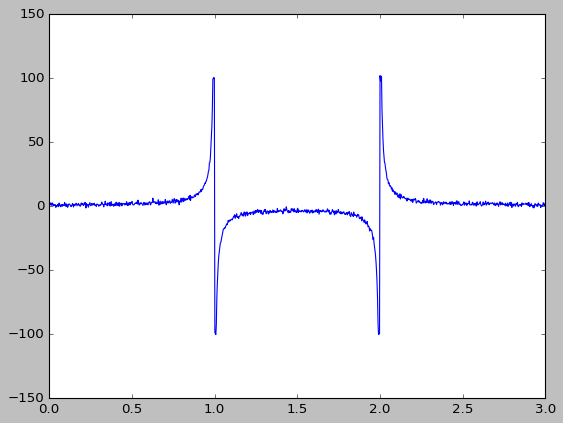

In [41]:
plt.plot(x, y)

In [42]:
def cost_function(a, b, c, d):
    y_pred = (a*x+b)/(x**2+c*x+d)
    return squares(y, y_pred) if -10 < a < 10 and\
                                     -10 < b < 10 and\
                                     -10 < c < 10 and\
                                     -10 < d < 10 else np.infty

def cost_function_v(theta):
    return cost_function(theta[0], theta[1], theta[2], theta[3])

In [43]:
initpopulation = np.random.rand(4, 10)*6-3

In [44]:
initpopulation

array([[-2.81048313,  2.61727348, -2.6881723 ,  0.24777801,  1.25436312,
         2.22581474,  1.28452159,  1.8103685 , -0.96329884,  1.88895068],
       [-2.51931092,  2.36889994,  0.28555426,  1.90378662, -0.28609029,
         0.86146617,  0.15841597,  1.38953713, -2.51022011, -2.6378875 ],
       [-1.5173806 , -2.04273192,  2.2307014 , -1.68471608,  2.85519153,
        -0.97862525, -1.90729251,  1.73819104,  0.95224665, -0.0108257 ],
       [ 0.33218131,  1.31521067, -1.62927155,  2.9780035 ,  2.84875897,
         0.90195412, -1.80274529,  1.08136945, -2.56680955, -2.81608499]])

In [45]:
optimal, val, stats, precision = difevol(cost_function_v, 4, 10, initpopulation = initpopulation, maxiter=1000,
                                         optpoint=np.array([0, 1, -3, 2]),
                                         maxbeststayiters=50)
optimal, val, stats, precision

(array([[-1.00998872],
        [ 1.01048951],
        [-2.00095664],
        [ 1.0009732 ]]),
 array([136442.46736124]),
 {'iterations': 591, 'funccalcs': 5920},
 9.175389055894213)

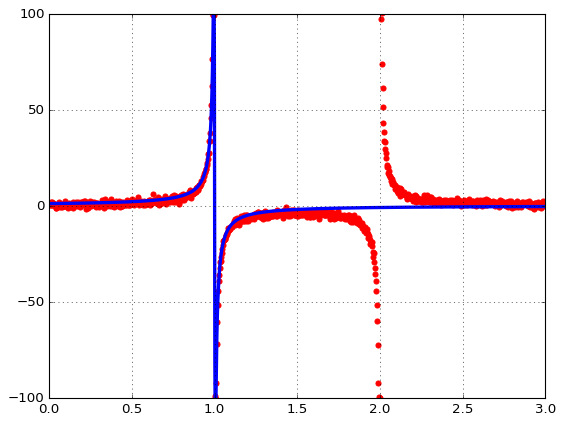

In [46]:
fig = plt.figure(facecolor="white")
plt.scatter(x, y, color = "red")
plt.plot(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]), linewidth = 3)
plt.ylim((-100, 100))
plt.xlim(0, 3)
plt.grid(True)

In [47]:
import pyswarm

In [ ]:
ans = pyswarm.pso(cost_function_v, lb = [-4, -4, -4 ,-4], ub = [4, 4, 4, 4], maxiter=10000, swarmsize=100,
                  debug=True)
ans

In [ ]:
plt.scatter(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [ ]:
from scipy.optimize import minimize

In [ ]:
nmans = minimize(fun = cost_function_v, x0 = np.array([0, 0, 0, 1]), method="Nelder-Mead", bounds=((-4, 4), (-4, 4), (-4, 4), (-4, 4)), options={"maxfev": 5000})
nmans

In [ ]:
plt.scatter(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [ ]:
xlist = np.linspace(-4, 4, 301)
ylist = np.linspace(-4, 4, 301)
X, Y = np.meshgrid(xlist, ylist)

In [ ]:
Z = np.array([[cost_function(x, y, -2.0208, 1.055) for x in xlist] for y in ylist])
cp = plt.contour(X, Y, Z, levels = 25, linewidths = 5)
#cp.axes.set_xticks(np.arange(0, 1, 0.05))
#cp.axes.set_yticks(np.arange(0, 1, 0.05))
cp.axes.grid(True)
plt.clabel(cp, inline=True,
          fontsize=10, colors = "black")

In [ ]:
import autograd as ag

In [ ]:
grad = ag.grad(cost_function_v)

In [ ]:
hess = ag.hessian(cost_function_v)
hess(np.array([1., 1., 1., 1.]))

In [ ]:
limits = np.array([[-4., 4.], [-4., 4.], [-4., 4.], [-4., 4.]])
limits

In [ ]:
lmans = levenmarq(cost_function_v, limits = limits, x0 = np.array([ 0., 0., 0., 1.]), regulpar=(1., 10.), funchess=hess, funcgrad=grad)
lmans

In [ ]:
plt.scatter(x, (lmans[0][0]*x + lmans[0][1])/(x*x+lmans[0][2]*x+lmans[0][3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [ ]:
minimize(cost_function_v, x0 = np.array([ 1. ,1. ,0., 1.]), method="BFGS")

In [ ]:
def residuals(theta):
    y_pred = (theta[0]*x+theta[1])/(x**2+theta[2]*x+theta[3])
    return y_pred - y

In [ ]:
from scipy.optimize import least_squares

In [ ]:
least_squares(residuals, x0 = np.array([ 0. ,0. ,0., 1.]))

In [ ]:
cost_function(1, -3, -6, 9.1)

In [ ]:
fig = plt.figure(facecolor="white")
plt.scatter(x, y, color = "blue", alpha = 0.6)
plt.plot(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]), linewidth = 10, color = "red", label = "Nelder-Mead", linestyle = "-.")
plt.plot(x, (lmans[0][0]*x + lmans[0][1])/(x*x+lmans[0][2]*x+lmans[0][3]), linewidth = 3, color = "cyan", label = "Levenberg-Marquardt")
plt.plot(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]), linewidth = 3, color = "green", label = "Differential Evolution")
plt.plot(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]), linewidth = 3, color = "purple", label = "Particle Swarm")
plt.ylim((-100, 100))
plt.xlim(0, 3)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axes = plt.axes([0.95, .1, .45, .45])
axes.plot(x, y, "bo")
axes.set_xlim((1.25, 1.7))
axes.set_ylim((-5, 5))
axes.yaxis.tick_right()
axes.scatter(x, y, color = "blue", alpha = 0.6)
axes.plot(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]), linewidth = 10, color = "red", label = "Nelder-Mead", linestyle = "-.")
axes.plot(x, (lmans[0][0]*x + lmans[0][1])/(x*x+lmans[0][2]*x+lmans[0][3]), linewidth = 3, color = "cyan", label = "Levenberg-Marquardt")
axes.plot(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]), linewidth = 3, color = "green", label = "Differential Evolution")
axes.plot(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]), linewidth = 3, color = "purple", label = "Particle Swarm")
axes.set_xlabel("Zoomed sector")
#axes.set_xticklabels(np.linspace(0.9999, 1., 11), rotation = -45)
#axes.xaxis.set_major_formatter(plt.FormatStrFormatter('%g'))

In [ ]:
tspmatrix = np.loadtxt("lau15_dist.txt", comments="#")
coordinates = np.loadtxt("lau15_xy.txt", comments="#")

In [ ]:
tspmatrix

In [ ]:
initpath = np.random.permutation(tspmatrix.shape[0])
initpath

In [ ]:
def plot_TSP(tspmatrix, coordinates, path):
    plt.scatter(coordinates[:, 0], coordinates[:, 1])
    n = tspmatrix.shape[0]
    for i in range(n):
        curr, next = path[i], path[(i+1)%n]
        plt.arrow(coordinates[curr, 0], coordinates[curr, 1],
                  coordinates[next, 0] - coordinates[curr, 0],
                  coordinates[next, 1] - coordinates[curr, 1])
        plt.annotate(str(tspmatrix[curr, next]),
                     ( (coordinates[next, 0] + coordinates[curr, 0])/2 ,
                     (coordinates[next, 1] + coordinates[curr, 1])/2 ),color = "red")
        plt.grid(True)

In [ ]:
distance(tspmatrix, initpath)

In [ ]:
plot_TSP(tspmatrix, coordinates, initpath)

In [ ]:
tspsolution = safortsp(tspmatrix, initpath)
print("Found path length is {}".format(tspsolution[1]))
plot_TSP(tspmatrix, coordinates, tspsolution[0])

In [ ]:
tspsolution = safortsp(tspmatrix, initpath)
print("Found path length is {}".format(tspsolution[1]))
plot_TSP(tspmatrix, coordinates, tspsolution[0])